[*********************100%***********************]  1 of 1 completed


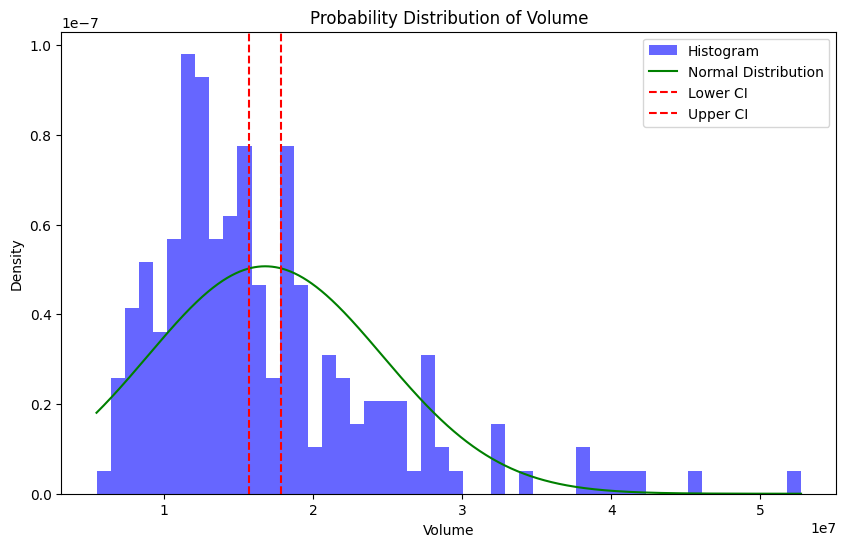

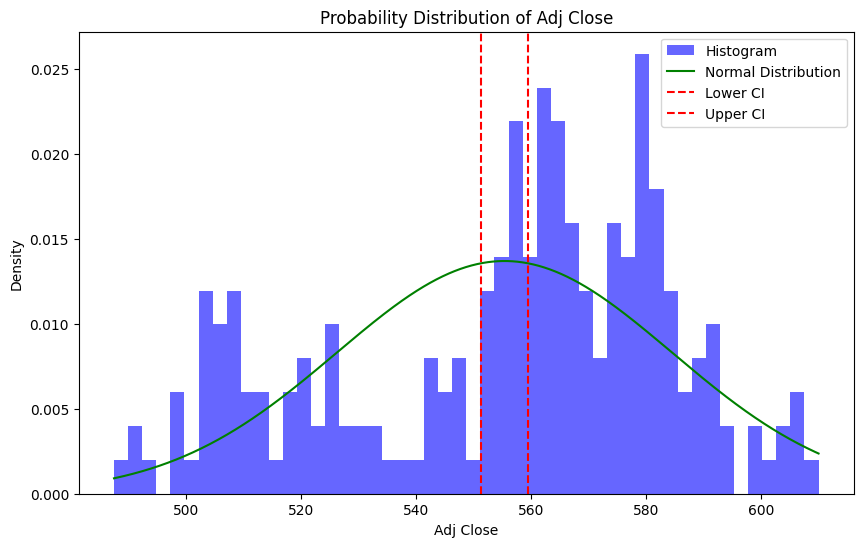

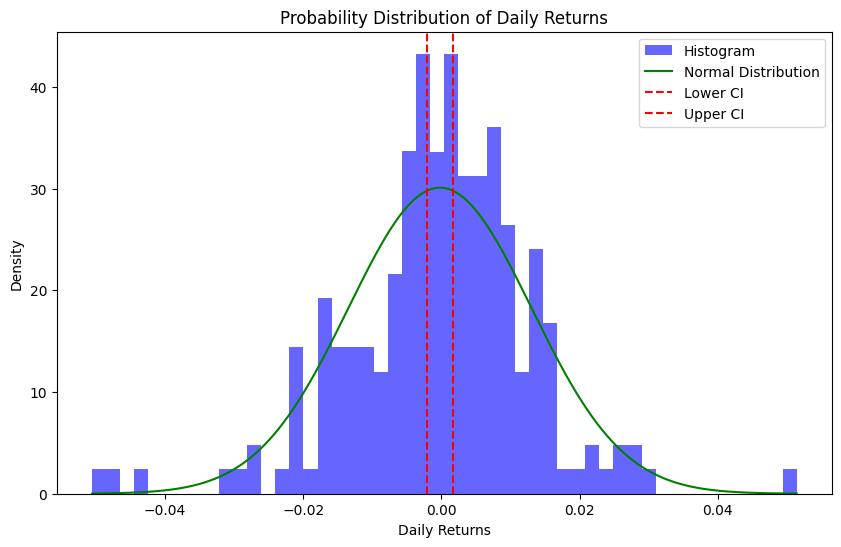


Statistics for Volume:
Mean: Ticker
SBIN.NS    1.679237e+07
dtype: float64
Standard Deviation: Ticker
SBIN.NS    7.868303e+06
dtype: float64
95% Confidence Interval: (array([15708854.33257333]), array([17875891.61864619]))

Statistics for Adj Close:
Mean: Ticker
SBIN.NS    555.395672
dtype: float64
Standard Deviation: Ticker
SBIN.NS    29.126265
dtype: float64
95% Confidence Interval: (array([551.38478764]), array([559.40655549]))

Statistics for Daily Returns:
Mean: -0.00020634602039335797
Standard Deviation: 0.01325774935757787
95% Confidence Interval: (-0.0020365508987363013, 0.0016238588579495852)


In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t

ticker = 'SBIN.NS'  
start_date = '2023-01-01'
end_date = '2023-11-01'

stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data['Daily Returns'] = stock_data['Adj Close'].pct_change()
stock_data

def compute_stats(data, column):
    mean = data[column].mean()
    std = data[column].std()
    n = len(data[column].dropna())

    data[f'{column} Z-Score'] = (data[column] - mean) / std

    data[f'{column} T-Score'] = (data[column] - mean) / (std / np.sqrt(n))

    conf_interval = t.interval(0.95, n-1, loc=mean, scale=std/np.sqrt(n))

    return mean, std, conf_interval

def distributions(data, column, mean, std, conf_interval):
    plt.figure(figsize=(10, 6))

    plt.hist(data[column].dropna(), bins=50, density=True, alpha=0.6, color='b', label='Histogram')

    # normal distribution curve
    x = np.linspace(data[column].min(), data[column].max(), 1000)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, color='g', label='Normal Distribution')

    # confidence interval
    plt.axvline(conf_interval[0], color='red', linestyle='dashed', label='Lower CI')
    plt.axvline(conf_interval[1], color='red', linestyle='dashed', label='Upper CI')

    plt.title(f'Probability Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    
columns_to_analyze = ['Volume', 'Adj Close', 'Daily Returns']
stats_results = {}

for column in columns_to_analyze:
    mean, std, conf_interval = compute_stats(stock_data, column)
    stats_results[column] = {'mean': mean, 'std': std, 'confidence_interval': conf_interval}

    distributions(stock_data, column, mean, std, conf_interval)

for column, stats in stats_results.items():
    print(f"\nStatistics for {column}:")
    print(f"Mean: {stats['mean']}")
    print(f"Standard Deviation: {stats['std']}")
    print(f"95% Confidence Interval: {stats['confidence_interval']}")
